<a href="https://colab.research.google.com/github/gibranfp/CursoAprendizajeAutomatizado/blob/master/notebooks/2a_lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal: ejemplo

<div style="text-align: right"> Bere et Richardt ML </div>

---

![xkcd-linreg](https://imgs.xkcd.com/comics/linear_regression.png)
<div style="text-align: center"> https://xkcd.com/1725/ </div>

## Calificaciones del curso de AP

El IIMAS tiene un conjunto de datos con las calificaciones del curso de aprendizaje profundo de años anteriores. Como atributos de entrada tiene la calificación del curso previo (aprendizaje automatizado) y las horas estudiadas en el curso. Como salida se tiene la calificación obtenida al final del curso. En este ejemplo vamos a entrenar un modelo de regresión lineal para estos datos de forma detallada.

### 1 Carga de datos

Importemos las bibliotecas:

In [1]:
# para correr con widgets en local instalar jupyter-matplotlib
# https://github.com/matplotlib/jupyter-matplotlib
# descomentar la siguiente linea:
#%matplotlib widget
# y correr de nuevo toda la libreta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

Leamos con Pandas:

In [2]:
!wget https://raw.githubusercontent.com/gibranfp/CursoAprendizajeAutomatizado/master/data/califs.csv
df = pd.read_csv("califs.csv")
df.head(5)

--2020-02-27 18:49:40--  https://raw.githubusercontent.com/gibranfp/CursoAprendizajeAutomatizado/master/data/califs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666 [text/plain]
Saving to: ‘califs.csv’

califs.csv          100%[===================>]     666  --.-KB/s    in 0s      

2020-02-27 18:49:40 (11.2 MB/s) - ‘califs.csv’ saved [666/666]



,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


Resumen del conjunto:

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
prev     50 non-null float64
horas    50 non-null float64
calif    50 non-null float64
dtypes: float64(3)
memory usage: 1.3 KB


Conversión de numpy:

In [4]:
x = np.array(df.iloc[:,:2])
print(x.shape)
x[:5]

(50, 2)


array([[ 5.6,  8.2],
       [ 6.7,  9.3],
       [ 5.1, 10. ],
       [ 5.7, 10.4],
       [ 7.1, 10.4]])

In [5]:
y_true = np.array(df.iloc[:,2])
print(y_true.shape)
y_true[:5]

(50,)


array([5.1, 5.9, 5.4, 6.5, 6.7])

Atributos y ejemplos:

In [6]:
m, n = x.shape
m, n

(50, 2)

Construcción de la matriz de diseño:

In [7]:
n += 1
x = np.hstack((np.ones((m, 1)), x))
print(x.shape)
x[:5]

(50, 3)


array([[ 1. ,  5.6,  8.2],
       [ 1. ,  6.7,  9.3],
       [ 1. ,  5.1, 10. ],
       [ 1. ,  5.7, 10.4],
       [ 1. ,  7.1, 10.4]])

Atributos y ejemplos:

In [8]:
m, n

(50, 3)

### 2 Exploración

Grafiquemos para tener una idea de la distribución de los datos:

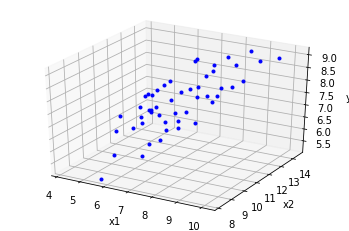

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[:, 1], x[:, 2], y_true, 'b.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

### 3 Hipótesis

Recordemos que dado un conjunto de ejemplos con atributos ($x_1$, $x_2$) y salidas $y$, la hipótesis de regresión lineal considerando un plano está dada por:

$$\hat{y} = \theta_0 + x_1 \theta_1 + x_2 \theta_2$$

donde $(\theta_0, \theta_1, \theta_2)$ son parámetros del modelo y $\hat{y}$ la salida predicha. Empleando la matriz de diseño, podemos expresar la hipótesis en su forma vectorial:

$$\hat{y} = x \theta$$

Nuestro trabajo consiste en estimar (aprender) los parámetros $(\theta_0, \theta_1, \theta_2)$. Por el momento supongamos que proponemos valores para los parámetros y hagamos inferencia:

In [10]:
t = np.array([1.7071569, 0.13335178, 0.41122846])

y_pred = []
for i in range(m):
    y_p = t[0] + x[i, 1] * t[1] + x[i, 2] * t[2]
    y_pred.append(y_p)
y_pred = np.array(y_pred)
y_pred[:5]

array([5.82600024, 6.4250385 , 6.49953558, 6.74403803, 6.93073052])

Implementando la forma vectorial:

In [11]:
y_pred = x @ t
y_pred[:5]

array([5.82600024, 6.4250385 , 6.49953558, 6.74403803, 6.93073052])

Grafiquemos el plano correspondiente a los parámetros propuestos:

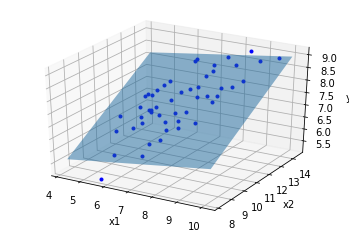

In [12]:
x1 = np.linspace(x[:,1].min(), x[:,1].max(), 2)
x2 = np.linspace(x[:,2].min(), x[:,2].max(), 2)
x1, x2 = np.meshgrid(x1, x2)
y_pred = t[0] + t[1] * x1 + t[2] * x2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y_pred, rstride=1, cstride=1, alpha=0.5)
ax.plot(x[:, 1], x[:, 2], y_true, 'b.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

### 4 Función de pérdida

La pérdida para este modelo es el error cuadrático medio y queda expresado de la siguiente manera:

$$ J(\mathbf{\theta}) = \frac{1}{2m}  \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} $$

en su forma vectorial:

$$ J(\mathbf{\theta}) = \frac{1}{2m} (\hat{y} - y)^T (\hat{y} - y) $$

Para los parámetros propuestos, la pérdida se puede implementar como:

In [13]:
# recomputamos las predicciones de los datos
y_pred = x @ t

loss = 0
for i in range(m):
    loss += (y_pred[i] - y_true[i])**2
loss /= 2 * m
loss

0.1416369054735457

y en su forma vectorial:

In [14]:
loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)
loss

0.14163690547354574

### 5 Descenso por gradiente

![graddes](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png)
<div style="text-align: center"> https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html </div>

El algoritmo del gradiente descendente se basa en el gradiente de la pérdida respecto de los parámetros:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})x^{(i)}_j}$$

en su forma vectorial:

$$\Delta J(\theta) = \frac{1}{m} x^T (\hat{y} - y)$$

Para los parámetros propuestos, el computo gradiente se puede implementar como:

In [15]:
grad = [0, 0, 0]
for j in range(len(grad)):
    for i in range(m):
        grad[j] += (y_pred[i] - y_true[i]) * x[i, j]
    grad[j] /= m
np.array(grad)

array([0.25249031, 1.50161512, 2.81670065])

y en su forma vectorial:

In [16]:
grad = (x.T @ (y_pred - y_true)) / m
grad

array([0.25249031, 1.50161512, 2.81670065])

Con base en el gradiente, la regla de actualización del descenso por gradiente queda expresada como:

$$\theta_j^{(t+1)} := \theta_j^{(t)}  - \alpha \frac{\partial J(\theta^{(t)})}{\partial \theta_j^{(t)}}$$

mientras que su forma vectorial:

$$\theta^{(t+1)} := \theta^{(t)}  - \alpha \Delta J(\theta^{(t)})$$

Para los parámetros propuestos y datos, el gradiente se puede implementar como:

In [17]:
alpha = 0.001

t_next = []
for t_j, g_j in zip(t, grad):
    t_j_next = t_j - alpha * g_j
    t_next.append(t_j_next)
t = np.array(t_next)
t

array([1.70690441, 0.13185016, 0.40841176])

y su forma vectorial:

In [18]:
# reniniciamos los parámetros
t = np.array([1.7071569, 0.13335178, 0.41122846])

t = t - alpha * grad
t

array([1.70690441, 0.13185016, 0.40841176])

### 6 Entrenamiento

Computemos 3 pasos del descenso por gradiente estocastico con lotes de 2 de forma manual. Primero inicilicemos de nuevo nuestros parámetros y taza de aprendizaje: 

In [19]:
alpha = 0.001
np.random.seed(0)
t = np.random.normal(0, 1, n)
t

array([1.76405235, 0.40015721, 0.97873798])

Computemos la pérdida total de los datos y mantengamos un historial:

In [20]:
y_pred = x @ t
loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)
loss_hist = [loss]
loss_hist

[40.18335645409401]

#### Paso 1

A) Selección del lote:

In [21]:
examples = [0, 24]
m_batch = len(examples)
x_batch = x[examples, :]
x_batch

array([[ 1. ,  5.6,  8.2],
       [ 1. ,  5.7, 11.9]])

In [22]:
y_true_batch = y_true[examples]
y_true_batch

array([5.1, 7.4])

B) Predicciones:

$$\hat{y} = \theta_0 + x_1 \theta_1 + x_2 \theta_2$$

In [23]:
y_pred_batch = x_batch @ t
y_pred_batch

array([12.03058418, 15.69193044])

C) Pérdida:

$$ J(\mathbf{\theta}) = \frac{1}{2m}  \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} $$

In [24]:
loss_batch = (y_pred_batch - y_true_batch).T @ (y_pred_batch - y_true_batch) / (2 * m_batch)
loss_batch

29.19727690183504

D) Gradiente:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})x^{(i)}_j}$$

In [25]:
grad_batch = (x_batch.T @ (y_pred_batch - y_true_batch)) / m_batch
grad_batch

array([ 7.61125731, 43.03763748, 77.75238129])

E) Parámetros actualizados:

$$\theta_j^{(t+1)} := \theta_j^{(t)}  - \alpha \frac{\partial J(\theta^{(t)})}{\partial \theta_j^{(t)}}$$

In [26]:
t = t - alpha * grad_batch
t

array([1.75644109, 0.35711957, 0.9009856 ])

F) Actualicemos el historial de pérdidas:

In [27]:
y_pred = x @ t
loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)
loss_hist.append(loss)
loss_hist

[40.18335645409401, 29.861730375150618]

#### Paso 2:

A) Selección del lote:

In [28]:
examples = [8, 32]
m_batch = len(examples)
x_batch = x[examples, :]
x_batch

array([[ 1. ,  6.3, 10.7],
       [ 1. ,  6. , 12.8]])

In [29]:
y_true_batch = y_true[examples]
y_true_batch

array([7.2, 7. ])

B) Predicciones:

$$\hat{y} = \theta_0 + x_1 \theta_1 + x_2 \theta_2$$

In [30]:
y_pred_batch = x_batch @ t
y_pred_batch

array([13.64684034, 15.43177423])

C) Pérdida:

$$ J(\mathbf{\theta}) = \frac{1}{2m}  \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} $$

In [31]:
loss_batch = (y_pred_batch - y_true_batch).T @ (y_pred_batch - y_true_batch) / (2 * m_batch)
loss_batch

28.164141743771424

D) Gradiente:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})x^{(i)}_j}$$

In [32]:
grad_batch = (x_batch.T @ (y_pred_batch - y_true_batch)) / m_batch
grad_batch

array([ 7.43930728, 45.60286975, 88.45395087])

E) Parámetros actualizados:

$$\theta_j^{(t+1)} := \theta_j^{(t)}  - \alpha \frac{\partial J(\theta^{(t)})}{\partial \theta_j^{(t)}}$$

In [33]:
t = t - alpha * grad_batch
t

array([1.74900178, 0.3115167 , 0.81253165])

F) Actualicemos el historial de pérdidas:

In [34]:
y_pred = x @ t
loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)
loss_hist.append(loss)
loss_hist

[40.18335645409401, 29.861730375150618, 20.137163255773686]

#### Paso 3:

A) Selección del lote:

In [35]:
examples = [16, 40]
m_batch = len(examples)
x_batch = x[examples, :]
x_batch

array([[ 1. ,  5.4, 11.5],
       [ 1. ,  8.7, 13.3]])

In [36]:
y_true_batch = y_true[examples]
y_true_batch

array([7. , 8.1])

B) Predicciones:

$$\hat{y} = \theta_0 + x_1 \theta_1 + x_2 \theta_2$$

In [37]:
y_pred_batch = x_batch @ t
y_pred_batch

array([12.77530596, 15.26586805])

C) Pérdida:

$$ J(\mathbf{\theta}) = \frac{1}{2m}  \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} $$

In [38]:
loss_batch = (y_pred_batch - y_true_batch).T @ (y_pred_batch - y_true_batch) / (2 * m_batch)
loss_batch

21.17595598253979

D) Gradiente:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})x^{(i)}_j}$$

In [39]:
grad_batch = (x_batch.T @ (y_pred_batch - y_true_batch)) / m_batch
grad_batch

array([ 6.47058701, 46.76485213, 80.86103185])

E) Parámetros actualizados:

$$\theta_j^{(t+1)} := \theta_j^{(t)}  - \alpha \frac{\partial J(\theta^{(t)})}{\partial \theta_j^{(t)}}$$

In [40]:
t = t - alpha * grad_batch
t

array([1.74253119, 0.26475185, 0.73167062])

F) Actualicemos el historial de pérdidas:

In [41]:
y_pred = x @ t
loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)
loss_hist.append(loss)
loss_hist

[40.18335645409401, 29.861730375150618, 20.137163255773686, 12.753983428922602]

### 7 Implementación

Esta es un implementación sencilla del descenso por gradiente de la forma vectorial explotando las capacidades de numpy:

In [42]:
def train(x, y_true, alpha=0.01, steps=50):
    # ejemplos, atributos
    m, n = x.shape
    # inicialización de parámetros
    t = np.random.normal(0, 1, n)
    # histórico de pérdidas
    loss_hist = []
    # ciclio de entrenamiento
    for i in range(steps):
        # computo de la hipótesis
        y_pred = x @ t
        # computo de la pérdida
        loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)
        # computo del gradiente
        grad = (x.T @ (y_pred - y_true)) / m
        # actualización de parámetros
        t = t - alpha * grad
        # histórico de pérdida
        loss_hist.append(loss)
    return t, loss_hist

Entrenemos nuestro modelo:

In [43]:
np.random.seed(0)
t, loss_hist = train(x, y_true)
t

array([1.7071569 , 0.13335178, 0.41122846])

Grafiquemos la evolución de la pérdida:

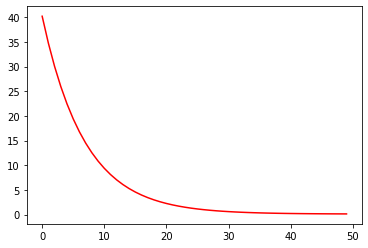

In [44]:
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, 'r')
plt.show()

### 8 Discusión

* ¿Como inicializamos los parámetros? ¿por qué no en ceros? ¿en qué afecta al entrenamiento?
* ¿Cómo influye la tas
a de aprendizaje?
* ¿Cómo elejimos el número de pasos de entrenamiento?

### 9 Tarea moral

Modificar esta libreta para implementar el descenso por gradiente estocastico.